In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
df.isnull().sum().sum()

np.int64(0)

In [29]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1142.0,1142.000000,1142.000000,1142.000000
mean,1.0,33.295972,79.820359,2810.465193
std,0.0,24.188530,23.764027,2364.314180
min,1.0,1.000000,18.950000,19.450000
25%,1.0,10.000000,70.150000,689.575000
50%,1.0,31.000000,84.850000,2263.750000
75%,1.0,56.000000,98.075000,4600.312500
max,1.0,72.000000,117.450000,8443.700000


In [31]:
df["customerID"].duplicated().sum()

np.int64(0)

In [48]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)


# we convert 0 and 1 of senior citizen to no and yes to make it easier to understand

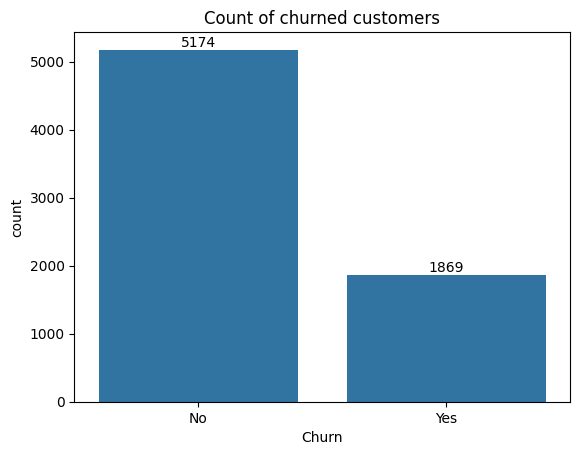

In [62]:
ax=sns.countplot(x='Churn' , data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of churned customers")
plt.show()

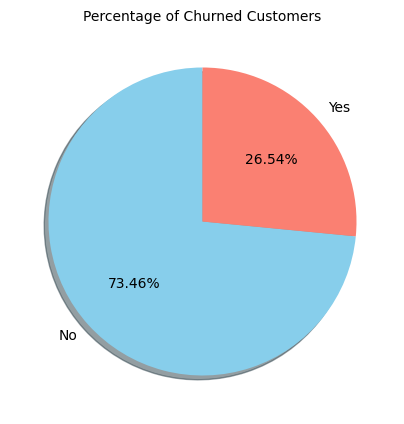

In [67]:
df['Churn'].value_counts().plot.pie(
    autopct='%1.2f%%',
    startangle=90,
    figsize=(5,5),
    colors=['skyblue', 'salmon'],
    labels=['No', 'Yes'],   
    shadow=True
)

plt.title('Customer Churn Distribution')
plt.ylabel('')  
plt.title("Percentage of Churned Customers" ,fontsize=10)
plt.show()

# 26.54 % Customers are churned out by the given data
# Let's Explain all the data

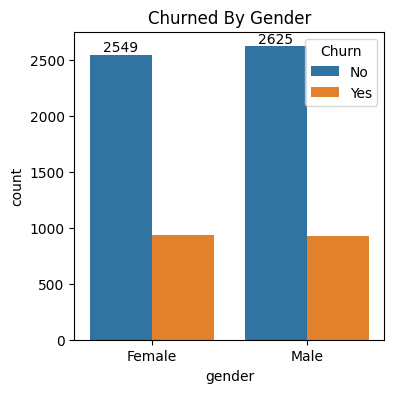

In [75]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='gender' , data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churned By Gender")
plt.show()

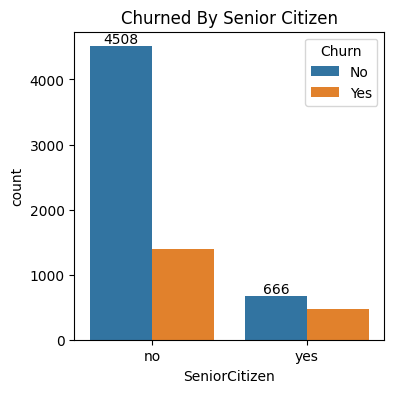

In [76]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='SeniorCitizen' , data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churned By Senior Citizen")
plt.show()

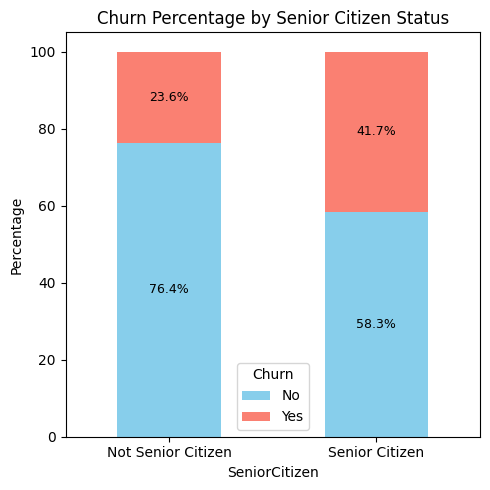

In [85]:

# Create a crosstab to count churn for senior citizens and non-senior citizens
count_data = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Convert to percentage
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = percent_data.plot(kind='bar', stacked=True, figsize=(5, 5), color=['skyblue', 'salmon'])

# Add percentage labels
for i in range(len(percent_data)):
    bottom = 0
    for val in percent_data.iloc[i]:
        ax.text(i, bottom + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=9)
        bottom += val

# Customize axes
plt.xticks([0, 1], ['Not Senior Citizen', 'Senior Citizen'], rotation=0)
plt.ylabel("Percentage")
plt.title("Churn Percentage by Senior Citizen Status")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

# comparative Senior citizens are churned out most by percentage

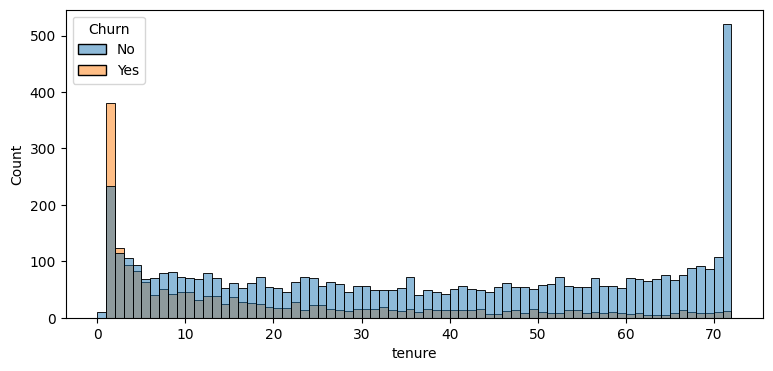

In [95]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,hue="Churn", bins= 72)
plt.show()

# people who use our service for a long time,they are churned out by very less quantity & who use our service for 1,2 month they are churned out mostly

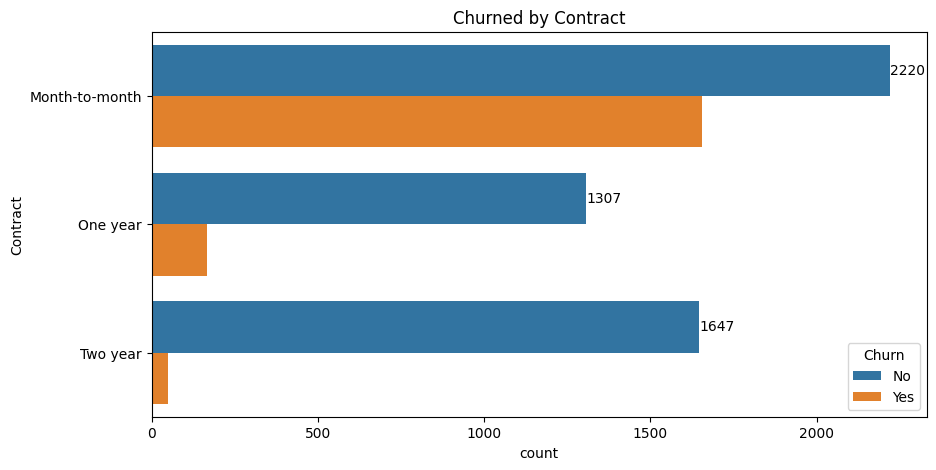

In [107]:
plt.figure(figsize=(10,5))
plt.title("Churned by Contract")
ax=sns.countplot(y="Contract" ,data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.show()              

# Those who taken month by month contract they are likely to be churned by than those to take 1 & 2 years contract

In [108]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

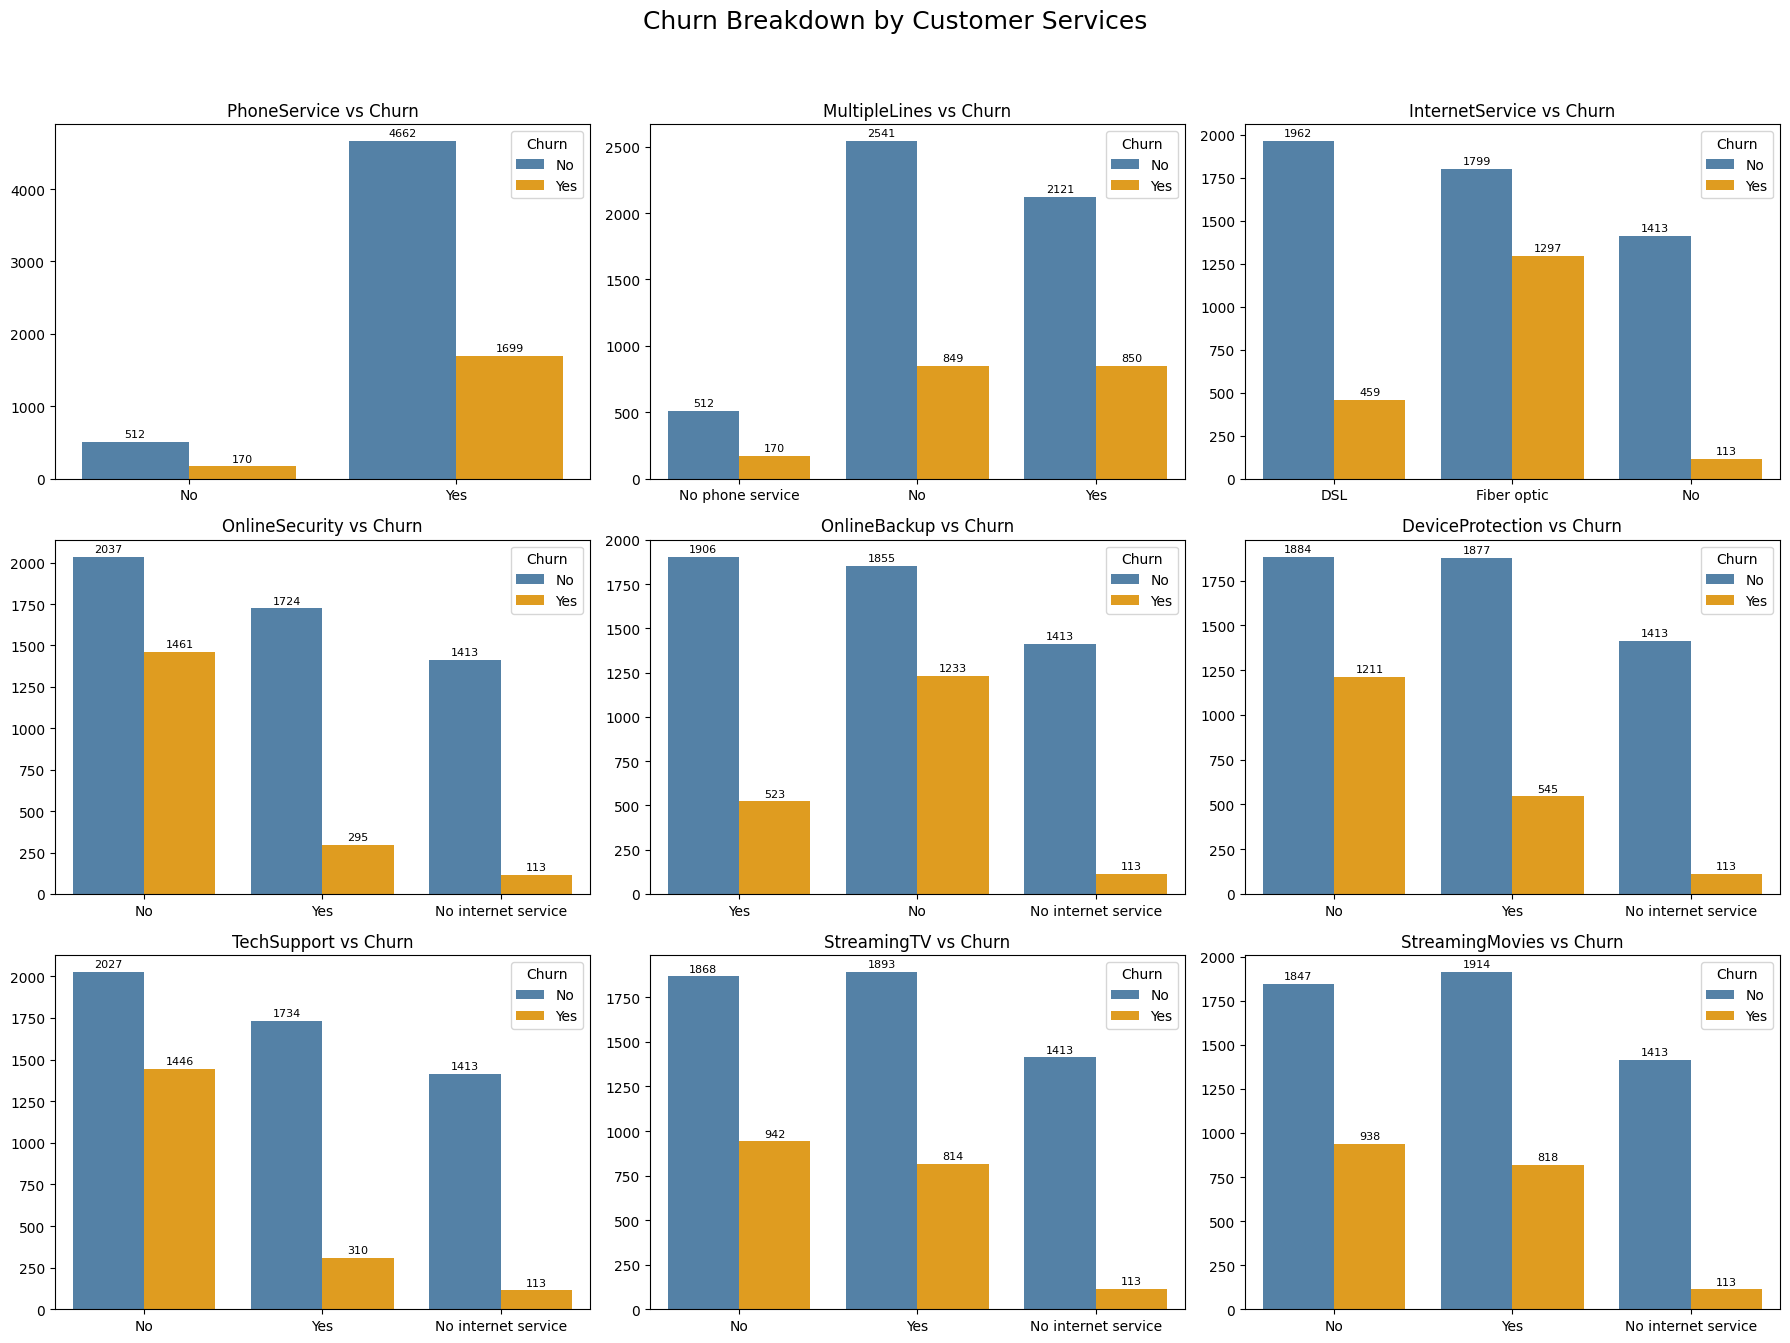

In [121]:
# List of service-related columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']
plt.style.use('default')

# Create subplots: 3 rows, 3 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 13))
axes = axes.flatten()

# Light-friendly readable color palette
palette = {'Yes': 'orange', 'No': 'steelblue'}  # Light theme-compatible

# Loop through columns to plot
for i, col in enumerate(cols):
    ax = sns.countplot(x=col, data=df, hue="Churn", ax=axes[i], palette=palette)
    ax.set_title(f'{col} vs Churn', fontsize=12)
    ax.tick_params(axis='x', rotation=0)  # Straight labels
    ax.set_xlabel("")
    ax.set_ylabel("")

    # Add count labels on bars
    for container in ax.containers:
        ax.bar_label(container, fontsize=8, padding=2)

# Global adjustments
plt.suptitle("Churn Breakdown by Customer Services", fontsize=18, y=1.03)
plt.tight_layout()
plt.show()

## 📊 Customer Churn Insights by Service Features

This analysis explores how different service subscriptions impact customer churn behavior. The plots reveal clear patterns across various features.

### 🔌 Internet Service
- **Fiber Optic users have the highest churn rate**.
  - Indicates possible dissatisfaction with pricing or expectations.
  - DSL users and those without internet churn significantly less.

### 🛡️ Online Security & Backup
- Customers **without Online Security or Online Backup** are more likely to churn.
  - Suggests that **value-added services increase customer retention**.
  - Security-conscious users may feel more confident in continuing the service.

### 🧰 Tech Support & Device Protection
- Lack of **Tech Support or Device Protection** also correlates with **higher churn**.
  - These services may improve customer satisfaction by resolving issues proactively.
  - Retention strategies should promote these offerings.

### 📺 Streaming Services
- **StreamingTV and StreamingMovies users** tend to churn more.
  - Possibly younger, tech-savvy, or price-sensitive customers.
  - May frequently explore other content platforms or bundles.

### 📞 Phone & Multiple Lines
- Nearly all customers have **PhoneService**, so it shows little variation.
- Customers with **MultipleLines** churn slightly more than those with a single line.
  - Larger households may be more sensitive to pricing or overall experience.

---

### ✅ Key Takeaways
- Focus churn-reduction efforts on **Fiber Optic** customers.
- Promote **security, backup, and support services** — they improve retention.
- Offer bundles or loyalty perks to **streaming and multi-line customers**.


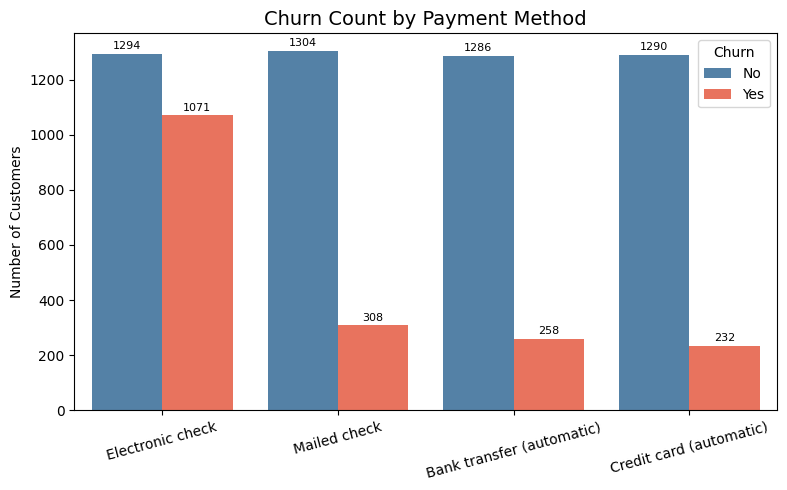

In [119]:
# Ensure light theme is used
plt.style.use('default')

plt.figure(figsize=(8, 5))

palette = {'Yes': 'tomato', 'No': 'steelblue'}

ax = sns.countplot(x='PaymentMethod', data=df, hue='Churn', palette=palette)

ax.tick_params(axis='x', rotation=15)
ax.set_title('Churn Count by Payment Method', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Number of Customers')

for container in ax.containers:
    ax.bar_label(container, fontsize=8, padding=2)

plt.tight_layout()
plt.show()

# Customer must churned out when they use Electronic check